# Code for Figure 4 & Figure S3

In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "./data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 8.48 s, sys: 2.76 s, total: 11.2 s
Wall time: 8.64 s


## Calculation with minimal tRNA set

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in

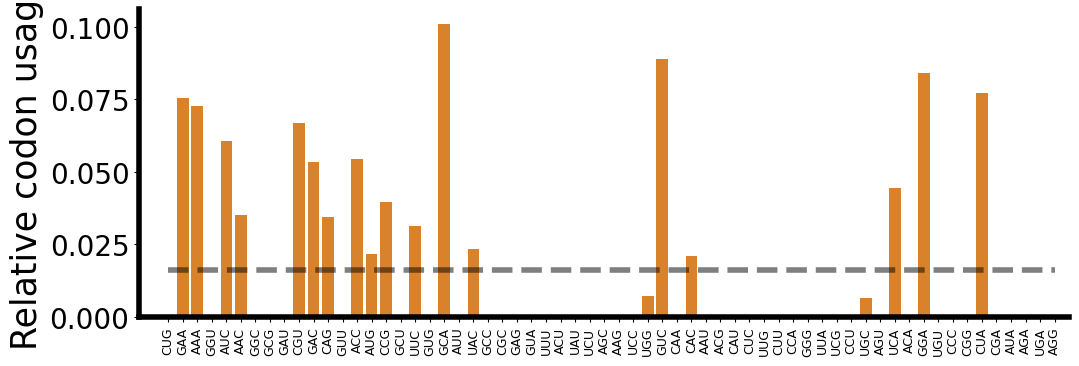

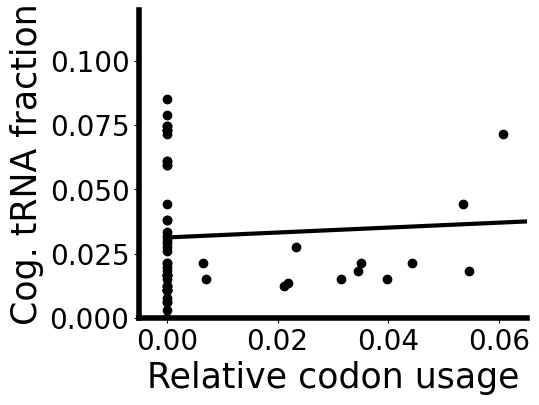

In [2]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

Red20_codontable = pd.read_excel('./data/tables/codonValues_RED20.xlsx',header=None)
Red20_pCodon = Red20_codontable[6]/sum(Red20_codontable[6])
Red20_codon_dict = dict(zip(Red20_codontable[9],Red20_codontable[11]))
Red20_pCodon_dict = dict(zip(Red20_codontable[9],Red20_pCodon))
fig,ax = plt.subplots(figsize=(12,4))


##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]
for i,codon in enumerate(codon_sorted):
    pCodon_sorted[i] = Red20_pCodon_dict[codon]

ax.bar(np.arange(62),pCodon_sorted,color='#d8832b',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax.set_xlim(-2,62)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Relative codon usage',fontsize=25)

codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt, red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,True)

#Sort codons by frequency; then compute their corresponding tRNA frequencies
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codon_sorted]

fig,ax = plt.subplots(figsize=(5,4))
ax.scatter(pCodon_sorted,ptRNA_sorted,color='black',label = 'Protein-coding codon')

#Fit scatter
y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_sorted,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_sorted,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_sorted,1)
print("slope: ", slope)

ax.set_xlim(-0.005,0.065)
ax.set_ylim(0,0.12)
ax.set_xlabel('Relative codon usage',fontsize=25)
ax.set_ylabel('Cog. tRNA fraction',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


## Minimal tRNA set, minimal code

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


248.51734339643954
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
R^2:  0.23678568129728872
slope:  0.678663873518424
R^2:  0.002338211772775045
slope:  0.14342477433731152
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'i

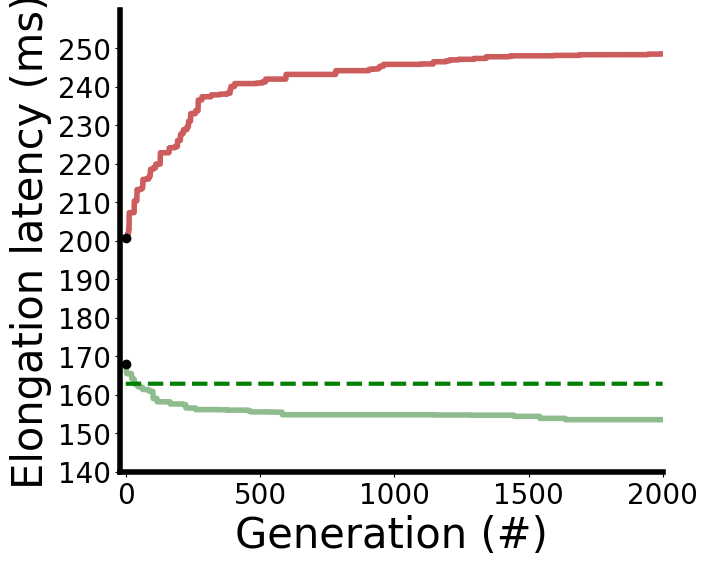

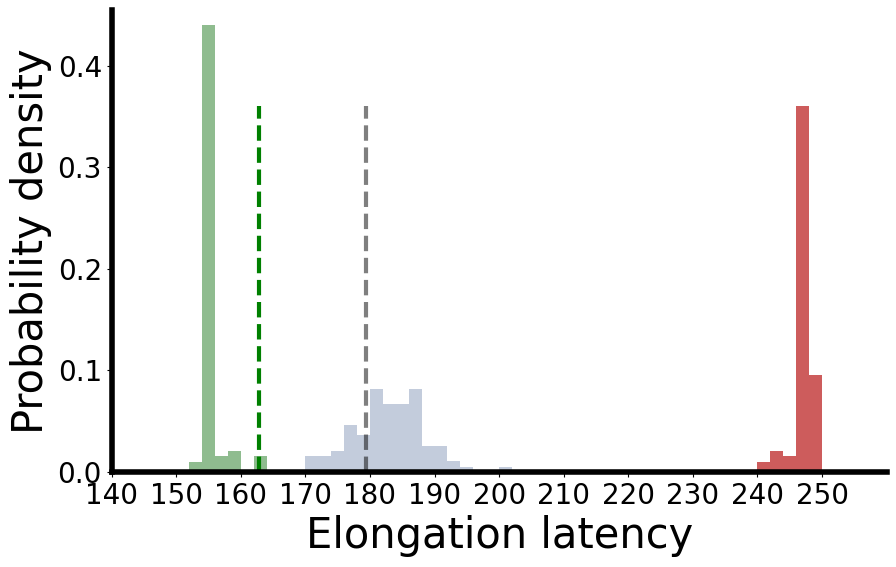

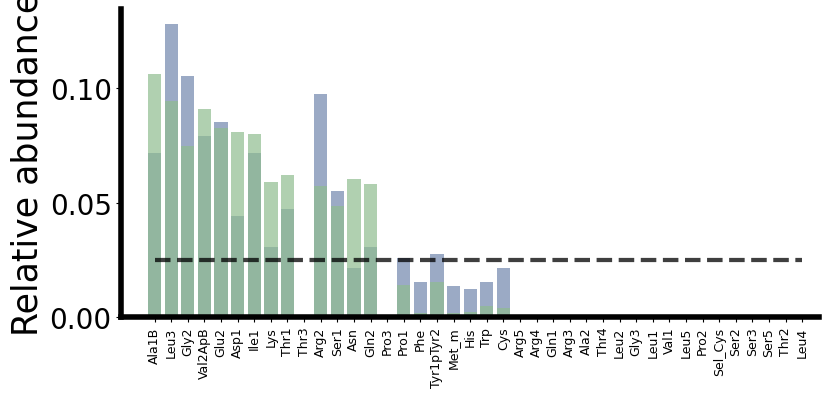

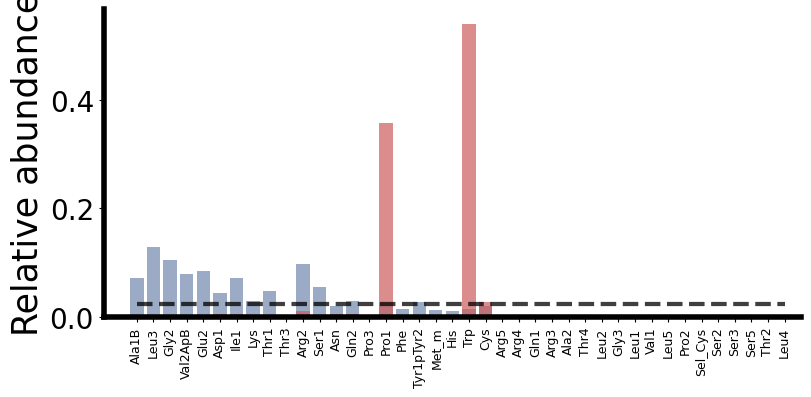

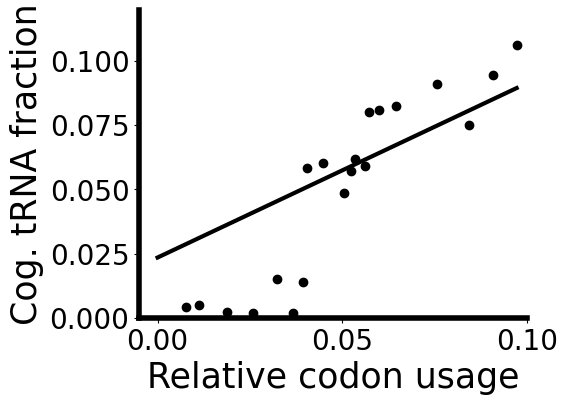

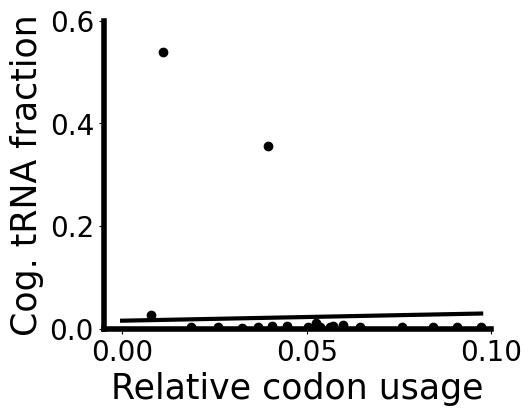

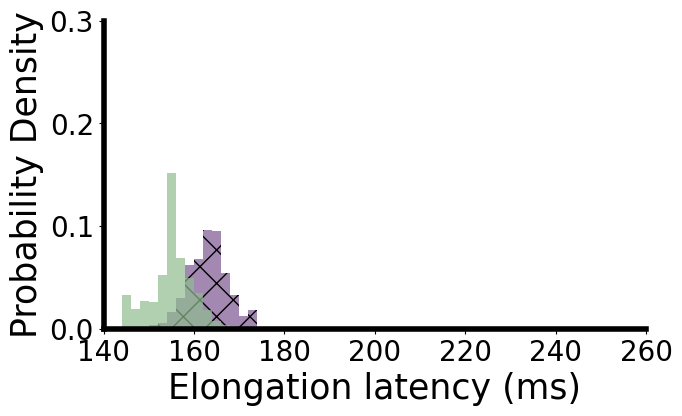

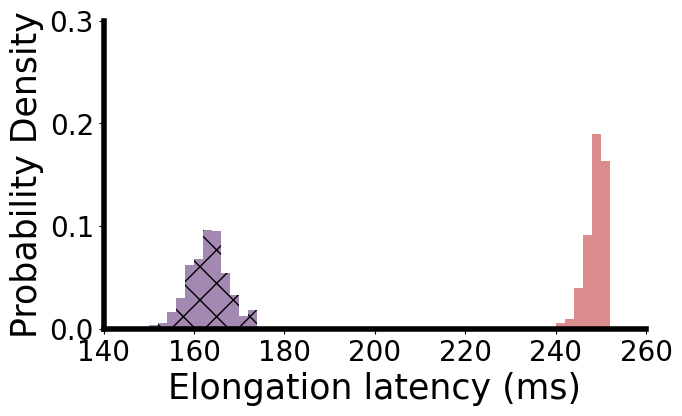

In [3]:
import matplotlib.pyplot as plt
import numpy as np


ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = np.array(ptRNA_red20[6]/sum(ptRNA_red20[6]))
tRNA_indices = np.argwhere(ptRNA_red20 == 0)
tRNA_indices = [indices[0] for indices in tRNA_indices]

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/minimaltRNA_minimalcode_2ksample_fasttRNA_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/minimaltRNA_minimalcode_2ksample_slowtRNA_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
elongt_minimaltRNA_minimalcodon, std = computeElongationLatency(ptRNA_red20,pCodon_transcriptome,ensmbl_latency_dict)
ax.plot(np.arange(len(fullelongt)),[elongt_minimaltRNA_minimalcodon]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency (ms)',fontsize=30)
ax.set_xlabel('Generation (#)',fontsize=30)
ax.set_ylim(140,260)
ax.set_yticks(np.arange(140,260,10))

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list_fast =np.load('./data/minimaltRNA_minimalcode_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data//minimaltRNA_minimalcode_2ksample_fasttRNA_ptRNA.npy')
hist=ax.hist(elongt_list_fast,30,range=(140,200),color='darkseagreen',density=True)

elongt_list_slow =np.load('./data//minimaltRNA_minimalcode_2ksample_slowtRNA_elongt.npy')
ptRNA_list_slow=np.load('./data//minimaltRNA_minimalcode_2ksample_slowtRNA_ptRNA.npy')
histslow=ax.hist(elongt_list_slow,30,range=(240,300),color='indianred',density=True)

elongt_list = np.load('./data//minimaltRNA_minimalcode_100sample_elongt.npy')
hist=ax.hist(elongt_list,30,range = (170,230),color='#39568CFF',density=True,alpha=0.3)


##Compute random distribution mean & WT and plot
ptRNA_uniform = np.ones(len(gr25_ptRNA))
ptRNA_uniform[tRNA_indices] = 0
ptRNA_uniform = ptRNA_uniform/sum(np.ones(len(gr25_ptRNA)))
elongt_uniformtRNA_minimalcodon, std = computeElongationLatency(ptRNA_uniform,pCodon_transcriptome,ensmbl_latency_dict)


ax.plot([elongt_uniformtRNA_minimalcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([elongt_minimaltRNA_minimalcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='green',linestyle='dashed')

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(140,260)
    ax.set_xticks(np.arange(140,260,10))
    ax.set_ylim(0,0.455)
    

### Plot tRNA distributions#######
#Wildtype
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

#Compute cognate distributions and sort codons by frequency
codon_elongt = compute_codon_elongt(ptRNA_red20, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = ptRNA_red20[tRNA_sorted_indices]
ptRNA_sorted_minimaltRNA_WT = ptRNA_sorted
tRNA_sorted_minimaltRNA_WT = tRNA_sorted

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ptRNA_sorted_minimaltRNA_min = ptRNA_min_sorted

#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(9,4))
ax1.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax1.bar(np.arange(40),ptRNA_max_sorted,color='indianred',width=0.8,alpha=0.7)
ax1.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax1.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
for ax in [ax,ax1]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlim(-2,40)
    ax.set_ylabel('Relative abundance',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    #ax.set_ylim(0,0.13)
ptRNA_sorted_minimaltRNA_max = ptRNA_max_sorted

    
####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_min_sorted_percodon = np.array([sum([ptRNA_min_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted])


zero_codon_indices = np.argwhere(pCodon_sorted != 0)
zero_codon_indices = [indices[0] for indices in zero_codon_indices]

ax3.scatter(pCodon_sorted[zero_codon_indices],ptRNA_min_sorted_percodon[zero_codon_indices],color='black',label = 'Protein-coding codon')
ptRNA_min_sorted_percodon_minimalset=ptRNA_min_sorted_percodon
pCodon_min_sorted= pCodon_sorted
codon_sorted_minimalset = codon_sorted

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_min_sorted_percodon,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_min_sorted_percodon,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_min_sorted_percodon,1)
print("slope: ", slope)

fig1,ax4 = plt.subplots(figsize=(5,4))
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_max_sorted_percodon = np.array([sum([ptRNA_max_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted])


zero_codon_indices = np.argwhere(pCodon_sorted != 0)
zero_codon_indices = [indices[0] for indices in zero_codon_indices]


ax4.scatter(pCodon_sorted[zero_codon_indices],ptRNA_max_sorted_percodon[zero_codon_indices],color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_max_sorted_percodon,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax4.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_max_sorted_percodon,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_max_sorted_percodon,1)
print("slope: ", slope)

ax3.set_ylim(0,0.12)
ax4.set_ylim(0,0.6)


for ax in [ax3,ax4]:
    ax.set_xlim(-0.005,0.1)
    ax.set_xlabel('Relative codon usage',fontsize=25)
    ax.set_ylabel('Cog. tRNA fraction',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

fig.savefig('./Figures/4c.svg', dpi=300,bbox_inches='tight')
fig1.savefig('./Figures/4e.svg', dpi=300,bbox_inches='tight')

#Plot the elongation latency of each gene for WT distribution as well as fast & slow distributions
fig,ax = plt.subplots(figsize=(7,4))
fig1,ax1 = plt.subplots(figsize=(7,4))

hist=ax.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(130,190),density=True,alpha=0.5,hatch='x')
hist=ax1.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(130,190),density=True,alpha=0.5,hatch='x')
transcriptome_elongt_WT = transcriptome_elongt

codon_elongt = compute_codon_elongt(ptRNA_min, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
hist=ax.hist(transcriptome_elongt,color='darkseagreen',bins=30,range=(130,190),density=True,alpha=0.7)
print(hist)
print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))
transcriptome_elongt_fast = transcriptome_elongt.copy()

codon_elongt = compute_codon_elongt(ptRNA_max, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
hist=ax1.hist(transcriptome_elongt,color='indianred',bins=30,range=(230,290),density=True,alpha=0.7)
print(hist)
print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

for ax in [ax,ax1]:
    ax.set_xlim(140,260)
    ax.set_ylim(0,0.3)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability Density',size=25)

fig.savefig('./Figures/4d.pdf', dpi=300,bbox_inches='tight')
fig1.savefig('./Figures/4f.pdf', dpi=300,bbox_inches='tight')

In [23]:
fig.savefig('./Figures/4d.pdf', dpi=300,bbox_inches='tight')
fig1.savefig('./Figures/4f.pdf', dpi=300,bbox_inches='tight')

/var/folders/wr/cby0172x24d_6b7kwlbjy44r0000gn/T/ipykernel_6099/249815598.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


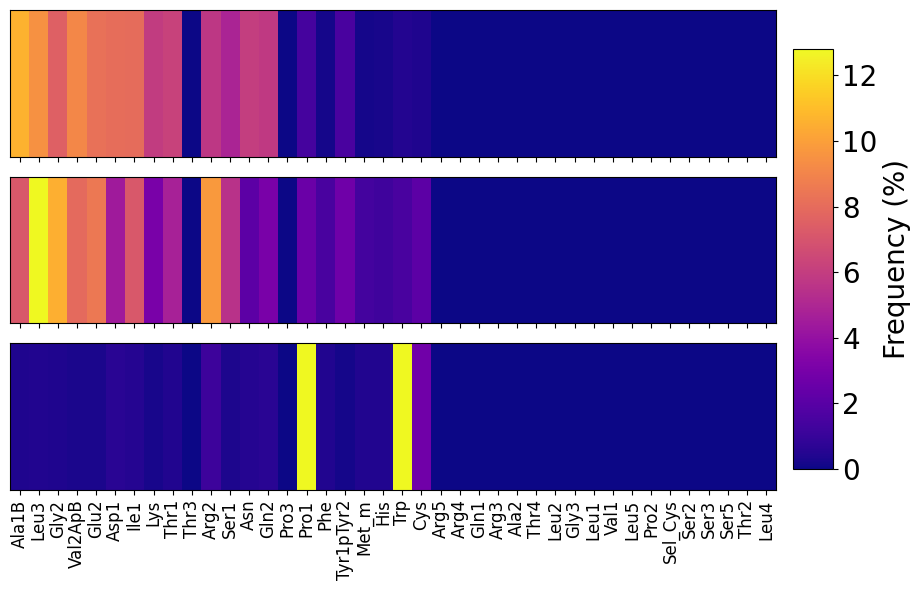

In [7]:
#minimal tRNA

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True,figsize=(8,6))

x = np.arange(0,40)
y = np.array(ptRNA_sorted_minimaltRNA_min)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:]*100, cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=12.8)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

x = np.arange(0,40)
y = np.array(ptRNA_sorted_minimaltRNA_WT)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:]*100, cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=12.8)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])

x = np.arange(0,40)
y = np.array(ptRNA_sorted_minimaltRNA_max)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax3.imshow(y[np.newaxis,:]*100, cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=12.8)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_minimaltRNA_WT,rotation='vertical')
ax3.tick_params(axis='x', which='major', labelsize=12)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.21, 0.05, 0.7])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Frequency (%)',size=20)

plt.tight_layout()
plt.show()    

fig.savefig('./Figures/4b.svg', dpi=300,bbox_inches='tight')


Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in

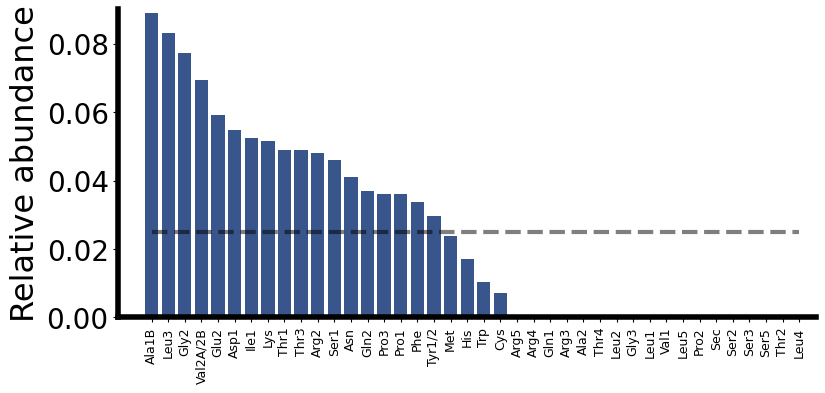

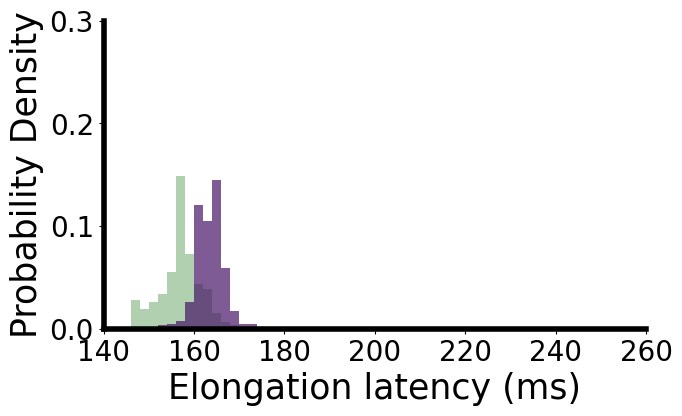

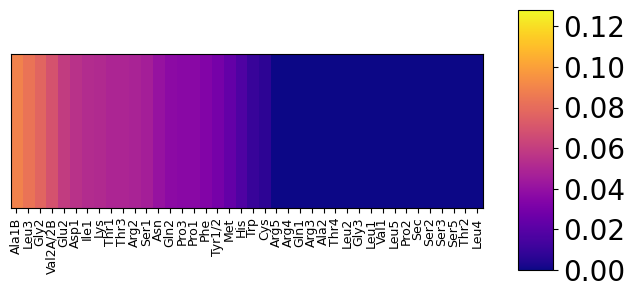

0.0


<Figure size 640x480 with 0 Axes>

In [41]:
#Supplemental test of codon-weighted distribution performance in RED20 transcriptome
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

Red20_codontable = pd.read_excel('./data/tables/codonValues_RED20.xlsx',header=None)
Red20_pCodon = Red20_codontable[6]/sum(Red20_codontable[6])
Red20_codon_dict = dict(zip(Red20_codontable[9],Red20_codontable[11]))
Red20_pCodon_dict = dict(zip(Red20_codontable[9],Red20_pCodon))

codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt, red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon,tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)

tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to transcriptome-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(resortedtRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt, red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon,tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),ptRNA_sorted,color='#39568CFF', width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=23)
ptRNA_sorted_correlatedCodon = ptRNA_sorted
print("ptRNA ", ptRNA_sorted)
print("Average elongation latency: ", np.average(transcriptome_elongt))

for ax in [ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)

    
#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))

hist=ax4.hist(transcriptome_elongt_fast,color='darkseagreen',bins=30,range=(130,190),density=True,alpha=0.7)
hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(130,190),density=True,alpha=0.7)
#ax4.plot([np.average(transcriptome_elongt)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')
ax4.set_ylim(0,0.3)
ax4.set_xlim(140,260)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

#Heatmap for tRNA codon-weighted correlated
fig, ax = plt.subplots(figsize=(7,2))

x = np.arange(0,40)
y = np.array(ptRNA_sorted_correlatedCodon)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.128)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax,ticks=[0.00,0.02,0.04,0.06,0.08,0.10,0.12])
cbar.ax.tick_params(labelsize=20)


plt.show()    
print(min(y))

plt.tight_layout()


In [ ]:
print(np.average(transcriptome_elongt))

# Extra

## Plot of baseline distributions to compare against. 

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Min. transcript elongation latency:  140.4916239068166
Max. transcript elongation latency:  190.38936954319556
Mean of elongation latency distrib:   164.0022816965547
Standard deviation of elongation latency distrib:   4.518679566659147


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Min. transcript elongation latency:  174.8934262427137
Max. transcript elongation latency:  189.67941983623288
Mean of elongation latency distrib:   179.54133281758192
Standard deviation of elongation latency distrib:   1.2238510322009781
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 

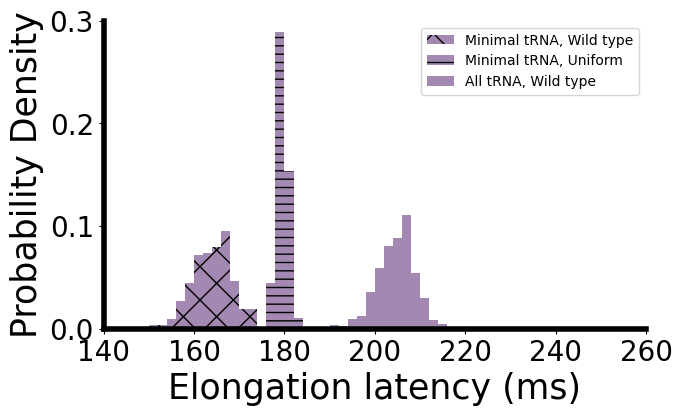

In [4]:
#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))


ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
codon_elongt = compute_codon_elongt(ptRNA_red20, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt, red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(130,190),density=True,alpha=0.5,hatch='x',label='Minimal tRNA, Wild type')


print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

ptRNA_red20_uniform = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20_uniform = ptRNA_red20_uniform[6]/sum(ptRNA_red20_uniform[6])
ptRNA_red20_uniform[ptRNA_red20_uniform>0] = 1/20
codon_elongt = compute_codon_elongt(ptRNA_red20_uniform, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt, red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(150,210),density=True,alpha=0.5,hatch='--',label='Minimal tRNA, Uniform')



print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt, red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(170,230),density=True,alpha=0.5, label='All tRNA, Wild type')


print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))


print(np.average(transcriptome_elongt))
ax4.set_ylim(0,0.3)
ax4.set_xlim(140,260)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

plt.legend()


for ax in [ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

## Calculation with full tRNA set

252.3243932154401
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
R^2:  0.20455851674136039
slope:  0.5041395380387282
R^2:  0.17404928709220902
slope:  -0.43245334655843964
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'i

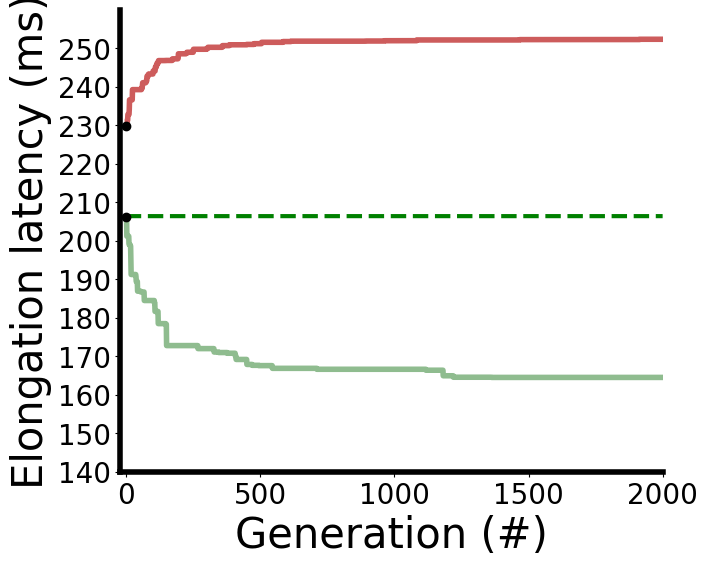

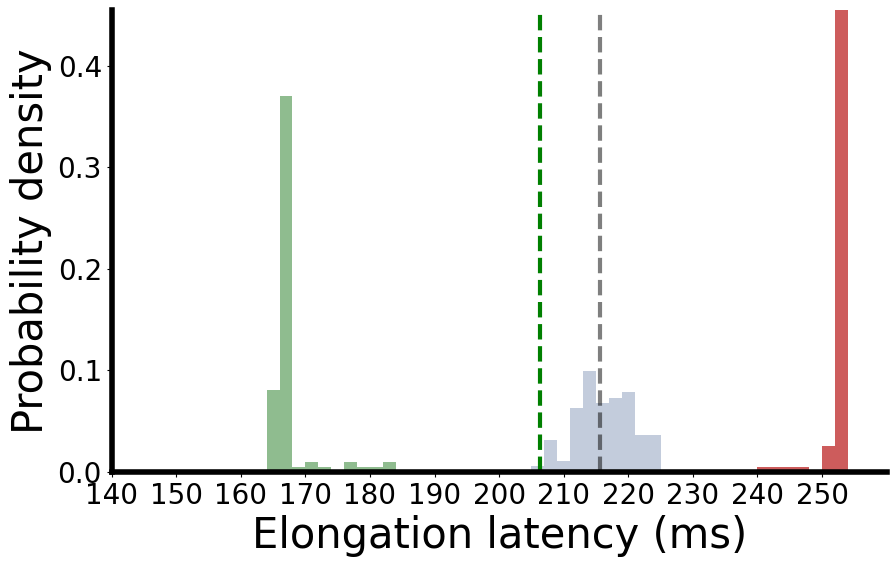

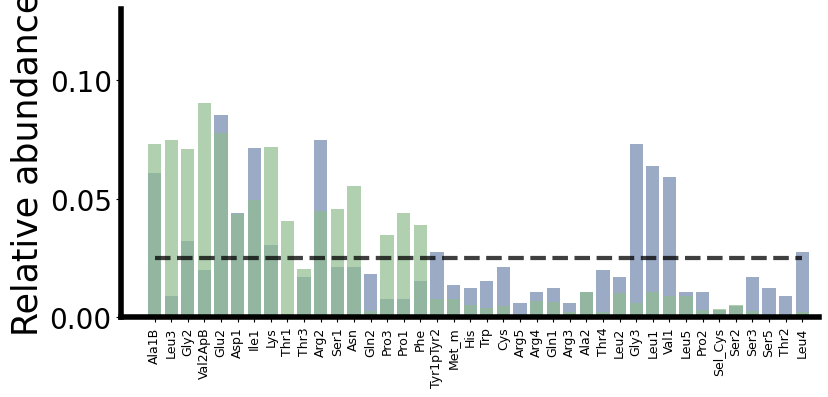

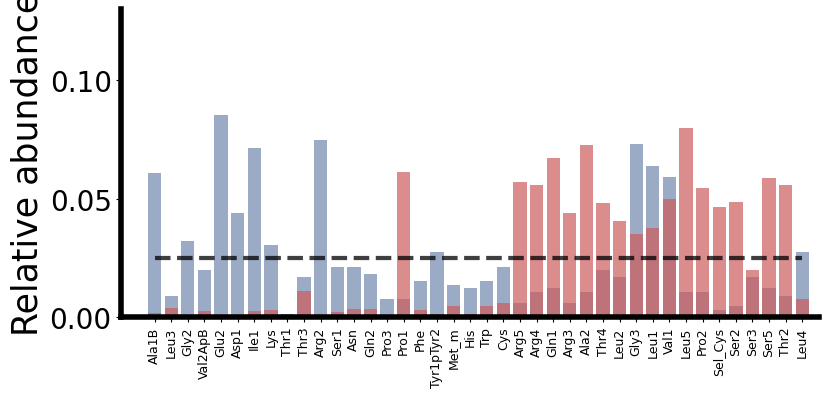

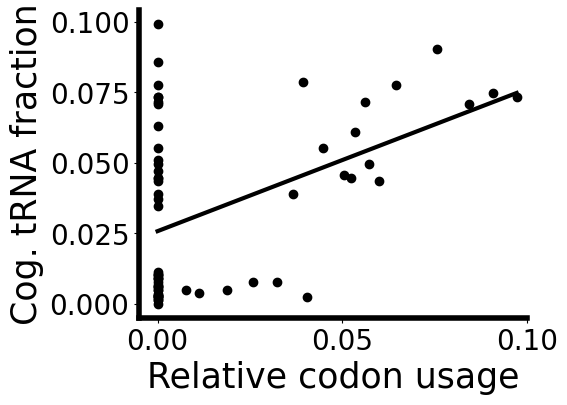

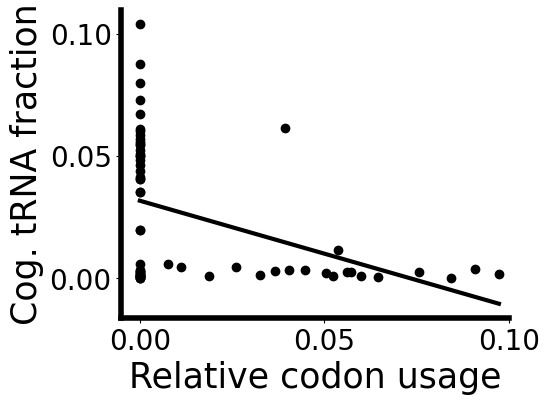

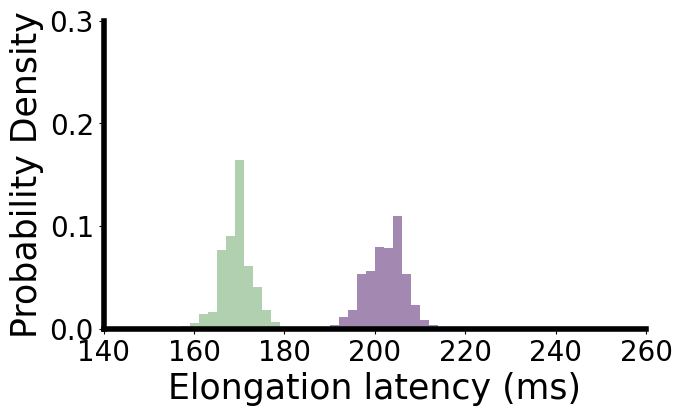

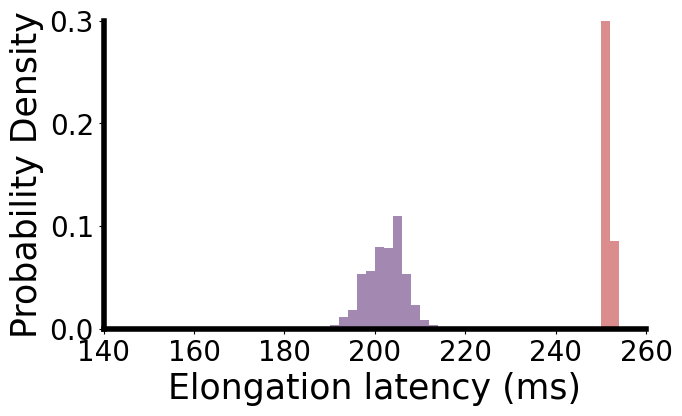

In [6]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/UniformRandomtRNA_minimalcode_2ksample_fasttRNA_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/UniformRandomtRNA_minimalcode_2ksample_slowtRNA_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')

elongt_WTtRNA_minimalcodon, std = computeElongationLatency(gr25_ptRNA,pCodon_transcriptome,ensmbl_latency_dict)
ax.plot(np.arange(len(fullelongt)),[elongt_WTtRNA_minimalcodon]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency (ms)',fontsize=30)
ax.set_xlabel('Generation (#)',fontsize=30)
ax.set_ylim(140,260)
ax.set_yticks(np.arange(140,260,10))

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list_fast =np.load('./data/UniformRandomtRNA_minimalcode_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_minimalcode_2ksample_fasttRNA_ptRNA.npy')
hist=ax.hist(elongt_list_fast,15,range=(164,194),color='darkseagreen',density=True)

elongt_list_slow =np.load('./data/UniformRandomtRNA_minimalcode_2ksample_slowtRNA_elongt.npy')
ptRNA_list_slow=np.load('./data/UniformRandomtRNA_minimalcode_2ksample_slowtRNA_ptRNA.npy')
histslow=ax.hist(elongt_list_slow,15,range=(240,270),color='indianred',density=True)

elongt_list = np.load('./data/UniformRandomtRNA_minimalcode_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)


##Compute random distribution mean & WT and plot
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
elongt_uniformtRNA_WTcodon, std = computeElongationLatency(ptRNA_uniform,pCodon_transcriptome,ensmbl_latency_dict)

ax.plot([elongt_uniformtRNA_WTcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([elongt_WTtRNA_minimalcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='green',linestyle='dashed')

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency (ms)',fontsize=30)
    ax.set_xlim(140,260)
    ax.set_xticks(np.arange(140,260,10))
    ax.set_ylim(0,0.455)

### Plot tRNA distributions#######
#Wildtype
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

#Compute cognate distributions and sort codons by frequency
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]
ptRNA_sorted_fulltRNA_WT = ptRNA_sorted
tRNA_sorted_fulltRNA_WT = tRNA_sorted

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ptRNA_sorted_fulltRNA_min = ptRNA_min_sorted

#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(9,4))
ax1.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax1.bar(np.arange(40),ptRNA_max_sorted,color='indianred',width=0.8,alpha=0.7)
ax1.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax1.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
for ax in [ax,ax1]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlim(-2,40)
    ax.set_ylabel('Relative abundance',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.13)
ptRNA_sorted_fulltRNA_max = ptRNA_max_sorted

    
####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_min_sorted_percodon = [sum([ptRNA_min_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
ax3.scatter(pCodon_sorted,ptRNA_min_sorted_percodon,color='black',label = 'Protein-coding codon')

ptRNA_min_sorted_percodon_fullset=ptRNA_min_sorted_percodon
pCodon_min_sorted_fullset  = pCodon_sorted
codon_sorted_fullset = codon_sorted


y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_min_sorted_percodon,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_min_sorted_percodon,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_min_sorted_percodon,1)
print("slope: ", slope)

fig,ax4 = plt.subplots(figsize=(5,4))
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_max_sorted_percodon = [sum([ptRNA_max_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
ax4.scatter(pCodon_sorted,ptRNA_max_sorted_percodon,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_max_sorted_percodon,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax4.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_max_sorted_percodon,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_max_sorted_percodon,1)
print("slope: ", slope)

for ax in [ax3,ax4]:
    ax.set_xlim(-0.005,0.1)
    #ax.set_ylim(0,0.12)
    ax.set_xlabel('Relative codon usage',fontsize=25)
    ax.set_ylabel('Cog. tRNA fraction',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

#Plot the elongation latency of each gene for WT distribution as well as fast & slow distributions
fig,ax = plt.subplots(figsize=(7,4))
fig,ax1 = plt.subplots(figsize=(7,4))

hist=ax.hist(transcriptome_elongt,color='#481567FF',bins=15,range = (190,220),density=True,alpha=0.5)
hist=ax1.hist(transcriptome_elongt,color='#481567FF',bins=15,range = (190,220),density=True,alpha=0.5)
transcriptome_elongt_WT = transcriptome_elongt

codon_elongt = compute_codon_elongt(ptRNA_min, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
hist=ax.hist(transcriptome_elongt,color='darkseagreen',bins=15,range = (155,185),density=True,alpha=0.7)
print(hist)
print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))


print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

codon_elongt = compute_codon_elongt(ptRNA_max, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt,red20=True)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
hist=ax1.hist(transcriptome_elongt,color='indianred',bins=15,range=(240,270),density=True,alpha=0.7)
print(hist)
print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))


print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

for ax in [ax,ax1]:
    ax.set_xlim(140,260)
    ax.set_ylim(0,0.3)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability Density',size=25)

/var/folders/wr/cby0172x24d_6b7kwlbjy44r0000gn/T/ipykernel_9435/4258349744.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


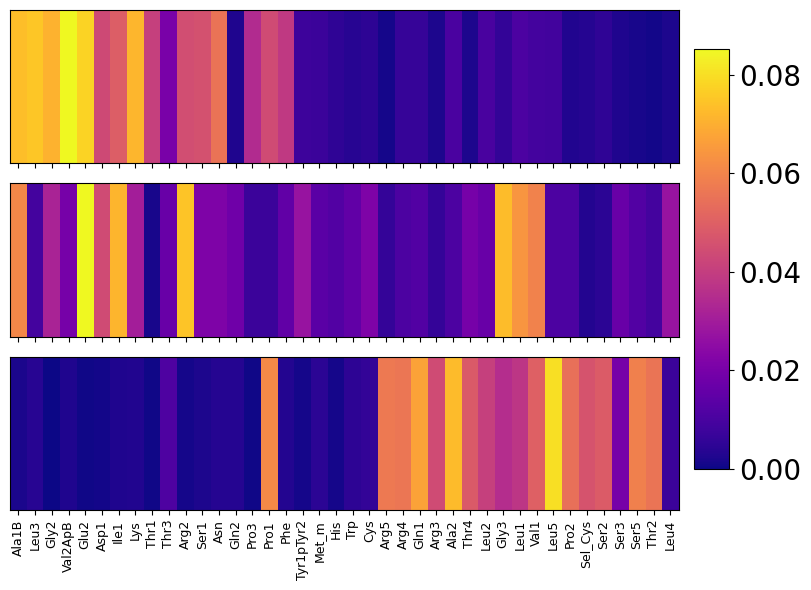

In [7]:
# Full tRNA
fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True,figsize=(7,6))

x = np.arange(0,40)
y = np.array(ptRNA_sorted_fulltRNA_min)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.0852)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
ax.tick_params(axis='x', which='major', labelsize=9)

x = np.arange(0,40)
y = np.array(ptRNA_sorted_fulltRNA_WT)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.0852)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])
ax2.tick_params(axis='x', which='major', labelsize=9)

x = np.arange(0,40)
y = np.array(ptRNA_sorted_fulltRNA_max)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.0852)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])


plt.xticks(range(len(tRNA_tags)), tRNA_sorted_fulltRNA_WT ,rotation='vertical')
ax3.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.21, 0.05, 0.7])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()  